In [1]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

# Configuration adjustments for faster training
max_features = 2000  # Number of words to consider as features
max_len = 100  # Further reduce the sequence length for faster processing
gru_units = 32  # Further reduce number of GRU units
embedding_dim = 64  # Reduce embedding dimensionality

# Load the IMDb data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Preprocess the data
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Define the model with further adjustments
model = keras.models.Sequential()
model.add(layers.Embedding(max_features, embedding_dim, input_length=max_len))
model.add(layers.GRU(gru_units, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [2]:
# Train the model with further adjustments
history = model.fit(x_train, y_train,
                    epochs=30,  # You may want to keep it to 10 or use early stopping
                    batch_size=256,  # Increased batch size for faster epochs
                    validation_split=0.2)

Epoch 1/30
79/79 [==============================] - 12s 125ms/step - loss: 0.6359 - accuracy: 0.6274 - val_loss: 0.4852 - val_accuracy: 0.7692
Epoch 2/30
79/79 [==============================] - 10s 122ms/step - loss: 0.4187 - accuracy: 0.8140 - val_loss: 0.3852 - val_accuracy: 0.8266
Epoch 3/30
79/79 [==============================] - 13s 160ms/step - loss: 0.3674 - accuracy: 0.8446 - val_loss: 0.3859 - val_accuracy: 0.8322
Epoch 4/30
79/79 [==============================] - 13s 163ms/step - loss: 0.3448 - accuracy: 0.8541 - val_loss: 0.3769 - val_accuracy: 0.8342
Epoch 5/30
79/79 [==============================] - 13s 158ms/step - loss: 0.3330 - accuracy: 0.8616 - val_loss: 0.3990 - val_accuracy: 0.8310
Epoch 6/30
79/79 [==============================] - 13s 159ms/step - loss: 0.3273 - accuracy: 0.8632 - val_loss: 0.3775 - val_accuracy: 0.8344
Epoch 7/30
79/79 [==============================] - 13s 160ms/step - loss: 0.3210 - accuracy: 0.8665 - val_loss: 0.3778 - val_accuracy: 0.8356

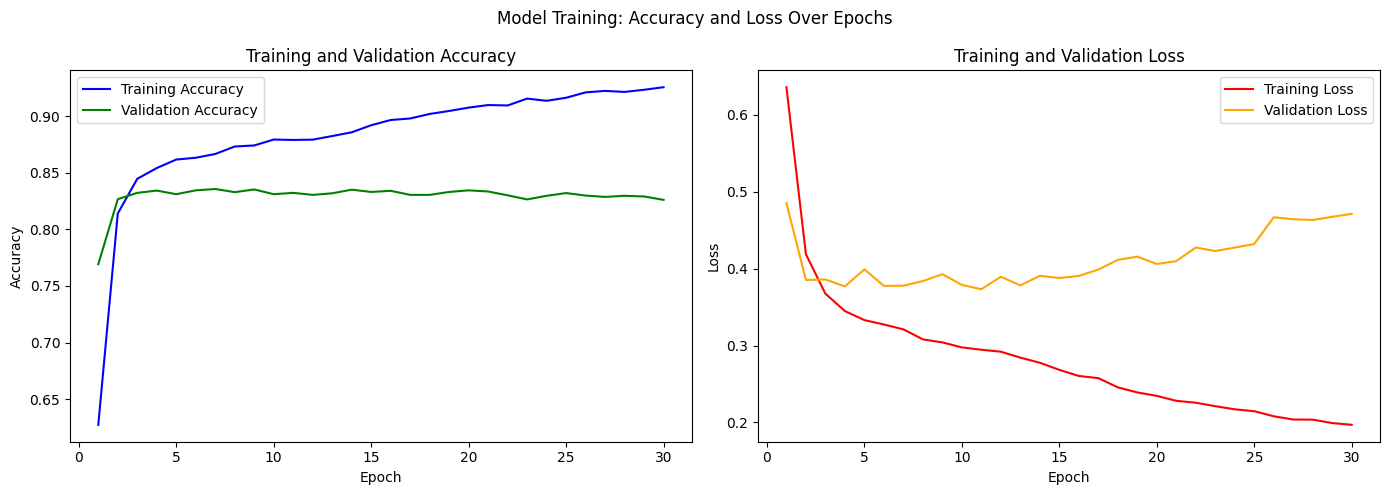

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# Converting history into a DataFrame
history_df = pd.DataFrame(history.history)

# Extracting epochs
epochs_range = np.array(range(1, len(history_df) + 1))

# Plot Training and Validation Accuracy
plt.figure(figsize=(14, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_df['accuracy'], label='Training Accuracy', color='blue')
plt.plot(epochs_range, history_df['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_df['loss'], label='Training Loss', color='red')
plt.plot(epochs_range, history_df['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Model Training: Accuracy and Loss Over Epochs")
plt.tight_layout()
plt.show()


In [4]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import regularizers

# Configuration adjustments for faster training
max_features = 2000  # Number of words to consider as features
max_len = 100  # Further reduce the sequence length for faster processing
gru_units = 32  # Further reduce number of GRU units
embedding_dim = 64  # Reduce embedding dimensionality

# Load the IMDb data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Preprocess the data
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Define the model with further adjustments
model = keras.models.Sequential()
model.add(layers.Embedding(max_features, embedding_dim, input_length=max_len))
model.add(layers.GRU(gru_units, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1, activation='sigmoid', 
                       kernel_regularizer=regularizers.l2(0.001))) # L2 Regularization

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [5]:
# Train the model with further adjustments
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2) 


Epoch 1/30
79/79 [==============================] - 12s 122ms/step - loss: 0.6264 - accuracy: 0.6439 - val_loss: 0.4964 - val_accuracy: 0.7734
Epoch 2/30
79/79 [==============================] - 11s 136ms/step - loss: 0.4160 - accuracy: 0.8171 - val_loss: 0.4101 - val_accuracy: 0.8146
Epoch 3/30
79/79 [==============================] - 14s 178ms/step - loss: 0.3682 - accuracy: 0.8443 - val_loss: 0.3828 - val_accuracy: 0.8316
Epoch 4/30
79/79 [==============================] - 14s 180ms/step - loss: 0.3506 - accuracy: 0.8540 - val_loss: 0.3910 - val_accuracy: 0.8282
Epoch 5/30
79/79 [==============================] - 16s 206ms/step - loss: 0.3350 - accuracy: 0.8635 - val_loss: 0.4042 - val_accuracy: 0.8264
Epoch 6/30
79/79 [==============================] - 15s 195ms/step - loss: 0.3273 - accuracy: 0.8676 - val_loss: 0.3962 - val_accuracy: 0.8238
Epoch 7/30
79/79 [==============================] - 14s 180ms/step - loss: 0.3237 - accuracy: 0.8671 - val_loss: 0.3825 - val_accuracy: 0.8336

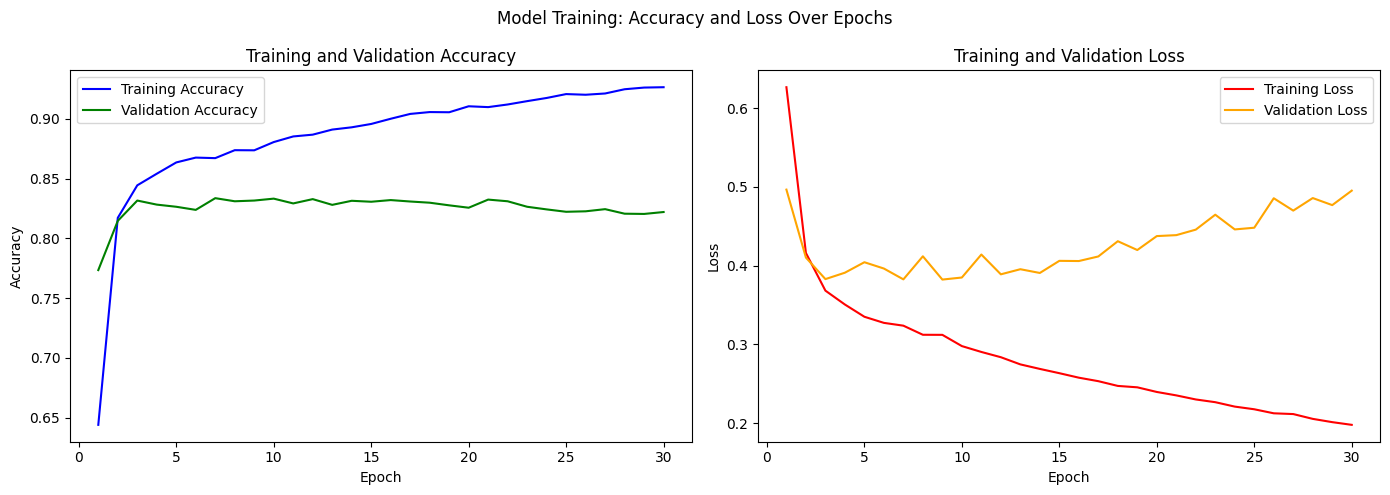

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# Converting history into a DataFrame
history_df = pd.DataFrame(history.history)

# Extracting epochs
epochs_range = np.array(range(1, len(history_df) + 1))

# Plot Training and Validation Accuracy
plt.figure(figsize=(14, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_df['accuracy'], label='Training Accuracy', color='blue')
plt.plot(epochs_range, history_df['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_df['loss'], label='Training Loss', color='red')
plt.plot(epochs_range, history_df['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Model Training: Accuracy and Loss Over Epochs")
plt.tight_layout()
plt.show()
